In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [30]:
df = pd.read_csv('/home/v-tyan/tsf_ideas_real/data/NYC Uber Pickups/uber_nyc_enriched.csv')

In [31]:
df

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29096,2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29097,2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29098,2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29099,2015-06-30 23:00:00,Staten Island,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


In [32]:
df.borough.value_counts()

Bronx            4343
Staten Island    4343
Queens           4343
Manhattan        4343
Brooklyn         4343
EWR              4343
Name: borough, dtype: int64

In [33]:
Bronx_df = df[df.borough == 'Bronx']
Staten_Island_df = df[df.borough == 'Staten Island']
Queens_df = df[df.borough == 'Queens']
Manhattan_df = df[df.borough == 'Manhattan']
Brooklyn_df = df[df.borough == 'Brooklyn']
EWR_df = df[df.borough == 'EWR']

In [54]:
Manhattan_df

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
10,2015-01-01 02:00:00,Manhattan,4345,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y
17,2015-01-01 03:00:00,Manhattan,4577,5.0,10.0,30.0,8.0,1022.3,0.0,0.0,0.0,0.0,Y
24,2015-01-01 04:00:00,Manhattan,3003,5.0,10.0,29.0,9.0,1022.0,0.0,0.0,0.0,0.0,Y
31,2015-01-01 05:00:00,Manhattan,1313,5.0,10.0,28.0,9.0,1021.8,0.0,0.0,0.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29071,2015-06-30 19:00:00,Manhattan,4585,5.0,10.0,80.0,58.0,1012.5,0.0,0.0,0.0,0.0,N
29078,2015-06-30 20:00:00,Manhattan,4210,8.0,10.0,80.0,58.0,1012.4,0.0,0.0,0.0,0.0,N
29085,2015-06-30 21:00:00,Manhattan,4313,7.0,10.0,76.0,61.0,1012.4,0.0,0.0,0.0,0.0,N
29091,2015-06-30 22:00:00,Manhattan,4452,5.0,10.0,76.0,64.0,1011.9,0.0,0.0,0.0,0.0,N


In [55]:
data = np.zeros((4343, 2)).astype('float')
for idx, (pickups, hday) in enumerate(zip(Manhattan_df.pickups, Manhattan_df.hday)):
    data[idx, 0] = pickups
    if hday == 'Y':
        data[idx, 1] = 1
data[:-1, 1] = data[1:, 1]
data[:, 0] = (data[:, 0] - np.min(data[:, 0])) / (np.max(data[:, 0]) - np.min(data[:, 0]))

In [56]:
np.save('Manhattan/Manhattan', data)

In [57]:
data

array([[0.66700495, 1.        ],
       [0.5511861 , 1.        ],
       [0.58061652, 1.        ],
       ...,
       [0.54712673, 0.        ],
       [0.56475961, 0.        ],
       [0.48560193, 0.        ]])

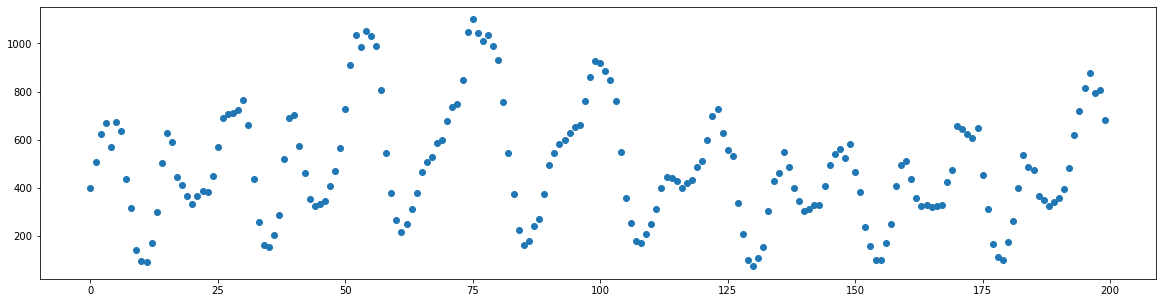

In [23]:
plt.figure(figsize=(20, 5))
plt.scatter(np.arange(len(Brooklyn_df[1000:1200])), Brooklyn_df.pickups[1000:1200])

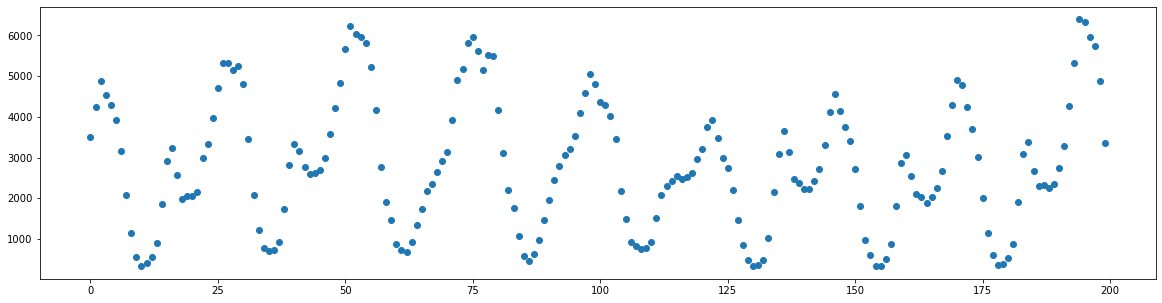

In [24]:
plt.figure(figsize=(20, 5))
plt.scatter(np.arange(len(Manhattan_df[1000:1200])), Manhattan_df.pickups[1000:1200])

In [15]:
data = np.load('Queens/data.npy')

In [3]:
data.shape

(4343, 2)

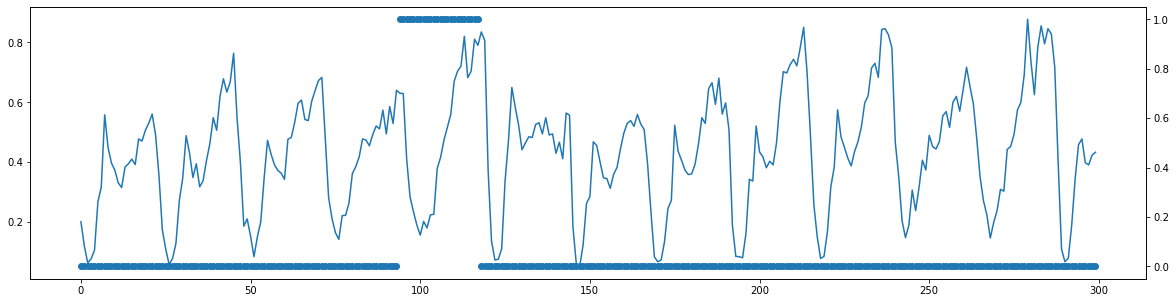

In [16]:
plt.figure(figsize=(20, 5))
plt.plot(range(300), data[3000:3300, 0])
plt.twinx()
plt.scatter(range(300), data[3000:3300, 1])